<a href="https://colab.research.google.com/github/davidedifilippo/learning_feedback_control_systems/blob/main/Esercizio_Sistemi_Tipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [3]:
#importo le librerie per i calcoli e i grafici 
import numpy as np
import control
import matplotlib.pyplot as plt

In [ ]:
# Define Direct Transfer Function

# s+5
num = np.array([1, 5])
# s(s+3) = s^2+3s+0
den = np.array([1, 3, 0])

F = control.tf(num, den)

print('F(s) =', F)

In [4]:
# Define Feedback Transfer Function

H = 1
K_desiderato = (1/H)

In [6]:
# Calcolo la funzione di trasferimento del sistema retroazionato

W = control.feedback(F, H)
print('W(s) =', W)

W(s) = 
    s + 5
-------------
s^2 + 4 s + 5



Poli del sistema retroazionato [-2.+1.j -2.-1.j]
Zeri del sistema retroazionato [-5.+0.j]


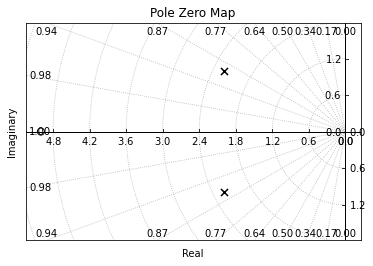

In [10]:
# Calcolo i poli della W(s)

p = control.poles(W)
print('Poli del sistema retroazionato', p)
z = control.zeros(W)
print('Zeri del sistema retroazionato', z)

control.pzmap(W, grid=True)
plt.show()

In [11]:
# Calcolo la funzione di trasferimento di errore We(s)

W_errore = control.parallel(K_desiderato, -W)
print('We(s) =', W_errore)


We(s) = 
  s^2 + 3 s
-------------
s^2 + 4 s + 5



In [12]:
# Risposta al gradino di ampiezza 1 nel tempo

tstart = 0
tstop = 4
tstep = 0.01

t = np.arange(tstart, tstop, tstep)

t, y = control.step_response(W, t)

In [13]:
# risposta a regime al gradino unitario

print("risposta a regime", np.round(y[-1], 2))

risposta a regime 1.0


In [14]:
# Errore nel tempo del sistema e(t) = y(t) - Kd*r(t) rispetto al riferimento di ampiezza 1 con Kd = 1

t, e = control.step_response(W_errore, t)


In [15]:
#Errore a regime

print("Errore a regime", np.round(e[-1], 2))

Errore a regime -0.0


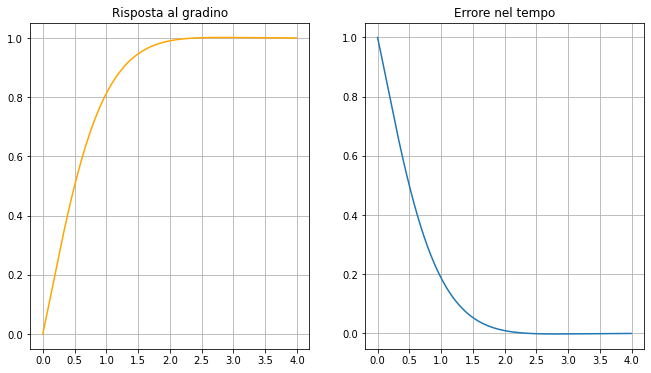

In [16]:
# Guardiamo la risposta nel tempo y(t) e l'errore nel tempo e(t) 

figure = plt.subplots(figsize=(11, 6))
plt.subplot(121)
plt.plot(t, y, color= "orange")
plt.title("Risposta al gradino")
plt.grid()


plt.subplot(122)
plt.plot(t, e)
plt.title("Errore nel tempo")
plt.grid()

# Mostra i due grafici

plt.show()

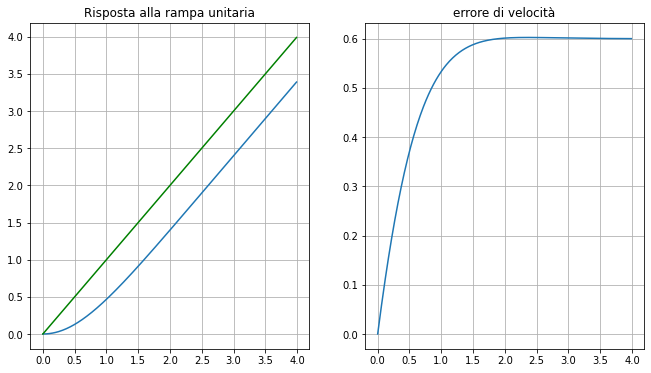

In [17]:
# Risposta alla rampa di pendenza unitaria:

r = 1*t

# Simulation :

t, y = control.forced_response(W, t, r)

# Plotting :

figure = plt.subplots(figsize=(11, 6))

plt.subplot(121)
plt.plot(t, y)
plt.plot(t, r, color= "green")
plt.title("Risposta alla rampa unitaria")
plt.grid()

t, e = control.forced_response(W_errore, t, r)

# Plotting :
plt.subplot(122)
plt.plot(t, e)

plt.title("errore di velocità")
plt.grid()
plt.show()